In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hw7_cars.csv")
df.isna().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

## Câu 1

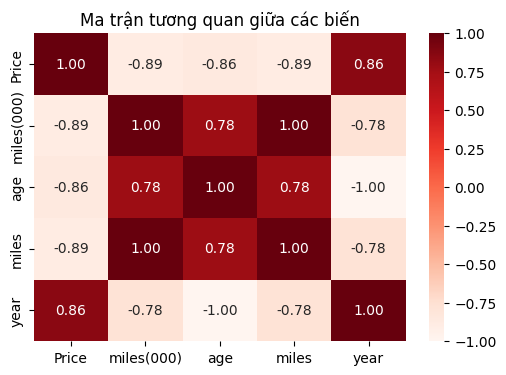

In [6]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

- Biến phù hợp: year, miles, age

## Câu 2

In [13]:
model = LinearRegression()
X=df[["year", "miles(000)", "age"]]
y = df["Price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [15]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Câu 3

In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse:.4f}')
print(f'r2: {r2:.4f}')

comparison = pd.DataFrame({"Thực tế:": y_test, "Dự đoán": y_pred})
print(comparison.head())

mse: 2394826.5413
r2: 0.8395
    Thực tế:       Dự đoán
43      5250   4866.899306
1      14000  16621.519047
24     12000  15351.967014
38     15700  16512.193615
8       8500   8660.388339
